In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import numpy as np
import networkx as nx
from copy import deepcopy

import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

from classes.agent import Agent
from classes.world import World
from classes.color_maps import ColorMaps
from classes.utils import *
from classes.news import News
from classes.agent import AgentState

In [10]:
def find_degreecentral_nodes(world, k, blacklist, news):
    degree_centrality = []
    for _ in range(k):
        best = None
        bdeg = -1
        for a in world.graph.nodes():
            if world.agents[a] in degree_centrality or world.agents[a] in blacklist:
                continue
            d = world.graph.out_degree(a)
            if d > bdeg:
                bdeg = d
                best = world.agents[a]
        degree_centrality.append(best)
    s2 = {}
    for agent in degree_centrality:
        s2[agent] = news.name
    return s2

In [11]:
def activate_agents(agents):
    for agent in agents.keys():
        agent.states[agents[agent]] = AgentState.ACTIVE

In [12]:
fake_news = News(0, 1.0, 0)
counter_news = News(1, 0.5, 0)
news_cycle = {fake_news.name: fake_news, counter_news.name: counter_news}
number_agents = 100
names_agents = [_ for _ in range(number_agents)]
threshold = np.clip(np.random.normal(0.5, 0.1, number_agents), 0.0, 1.0) #mu = 0.5, sigma = 0.1
independence = np.clip(np.random.normal(0.5, 0.1, number_agents), 0.0, 1.0) #mu = 0.5, sigma = 0.1
w = construct_world(names_agents, threshold, independence, news_cycle)
fakenews_spreader = find_degreecentral_nodes(w, 1, [], fake_news)
counternews_spreader = find_degreecentral_nodes(w, 5, [a for a in fakenews_spreader.keys()], counter_news)

FileNotFoundError: [Errno 2] No such file or directory: 'animation/counternews0.png'

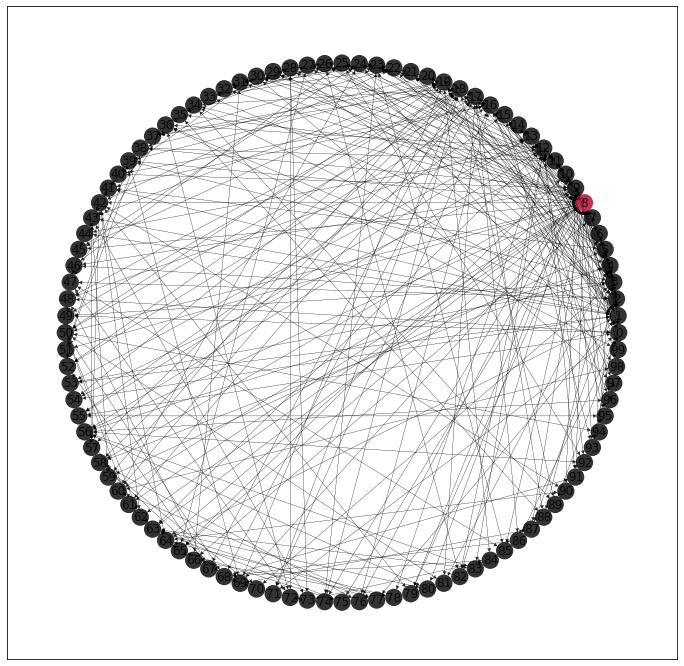

In [13]:
steps = 100
delay = 10
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)
starting_points = {0: fakenews_spreader, delay: counternews_spreader}

for step in range(steps):
    if step in starting_points.keys():
        activate_agents(starting_points[step])
    ax.clear()
    clrs = [ColorMaps.coolwarm(1.0) if a.states[0] == AgentState.ACTIVE else 
            (ColorMaps.coolwarm(0.0) if a.states[1] == AgentState.ACTIVE else (0.0,0.0,0.0)) 
            for a in w.agents.values()]

    nx.draw_networkx(w.graph,
                     pos=nx.circular_layout(w.graph),
                     ax=ax,
                     arrowstyle=ArrowStyle.CurveFilledB(head_length=0.5, head_width=0.3),
                     arrowsize=max(-0.04 * w.graph.order() + 10, 1),
                     with_labels=True,
                     node_size=300,
                     node_color=clrs,
                     alpha=0.8,
                     linewidths=0.0,
                     width=0.2)
    plt.savefig("animation/counternews" + str(step) + ".png")
    
    